In [ ]:
!pip install autokeras
!pip install keras-tuner

import autokeras as ak
import tensorflow as tf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 39.9 MB/s eta 0:00:00
Using TensorFlow backend


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Загрузка данных
from google.colab import files
uploaded = files.upload()

import io
data_csv = pd.read_excel('Копия отправка_комбинации поддержка после ПХТ 3 стадия.xlsx')

# Определение категориальных и числовых столбцов
categorical_features = data_csv.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Ответ эксперта (Лактионов)')

numerical_features = data_csv.select_dtypes(exclude=['object']).columns.tolist()
numerical_features.remove('Поставьте галочку, если уверены на 100%')
# Преобразование всех категориальных переменных в строки
for feature in categorical_features:
    data_csv[feature] = data_csv[feature].astype(str)

# Теперь продолжим предобработку
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

X = data_csv.drop(columns=['Ответ эксперта (Лактионов)', 'Поставьте галочку, если уверены на 100%'])
X_transformed = preprocessor.fit_transform(X)

# Создание целевых переменных
y_classification = data_csv['Ответ эксперта (Лактионов)'].astype('category').cat.codes
y_confidence = data_csv['Поставьте галочку, если уверены на 100%']

# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_class_train, y_class_val, y_conf_train, y_conf_val = train_test_split(X_transformed, y_classification, y_confidence, test_size=0.3, random_state=42)


# Создание и выполнение преобразований
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

X = data_csv.drop(columns=['Ответ эксперта (Лактионов)', 'Поставьте галочку, если уверены на 100%'])
X_transformed = preprocessor.fit_transform(X)
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую, валидационную и тестовую выборки
X_temp, X_test, y_class_temp, y_class_test, y_conf_temp, y_conf_test = train_test_split(X_transformed, y_classification, y_confidence, test_size=0.1, random_state=42)
X_train, X_val, y_class_train, y_class_val, y_conf_train, y_conf_val = train_test_split(X_temp, y_class_temp, y_conf_temp, test_size=0.2, random_state=42)


# Создание целевых переменных
y_classification = data_csv['Ответ эксперта (Лактионов)'].astype('category').cat.codes
y_confidence = data_csv['Поставьте галочку, если уверены на 100%']

# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_class_train, y_class_val, y_conf_train, y_conf_val = train_test_split(X_transformed, y_classification, y_confidence, test_size=0.3, random_state=42)


Saving Копия отправка_комбинации поддержка после ПХТ 3 стадия.xlsx to Копия отправка_комбинации поддержка после ПХТ 3 стадия (3).xlsx


In [ ]:
# Определяем входные данные
input_node = ak.StructuredDataInput()

# Определяем блок обработки данных
output_node = ak.StructuredDataBlock()(input_node)

# Определяем блок для многоклассовой классификации
classification_head = ak.ClassificationHead(num_classes=len(y_class_train.unique()),
                                            loss='sparse_categorical_crossentropy',
                                            metrics=['accuracy'])(output_node)

# Определяем блок для регрессии (уверенность доктора)
regression_head = ak.RegressionHead(loss='mean_squared_error',
                                    metrics=['mse'])(output_node)

# Создаем и компилируем автоматическую модель
auto_model = ak.AutoModel(inputs=input_node,
                          outputs=[classification_head, regression_head],
                          overwrite=True,
                          max_trials=10)  # max_trials определяет, сколько разных моделей будет протестировано

# Обучаем модель
auto_model.fit(X_train, [y_class_train, y_conf_train], epochs=10, validation_data=(X_val, [y_class_val, y_conf_val]))


Trial 10 Complete [00h 09m 05s]
val_loss: 1.574137422721833e-05

Best val_loss So Far: 2.937570684480306e-07
Total elapsed time: 01h 36m 18s
Epoch 1/10
5444/5444 [==============================] - 20s 4ms/step - loss: 0.1245 - classification_head_1_loss: 0.1052 - regression_head_1_loss: 0.0193 - classification_head_1_accuracy: 0.9686 - regression_head_1_mse: 0.0193 - val_loss: 0.0019 - val_classification_head_1_loss: 0.0018 - val_regression_head_1_loss: 1.2651e-04 - val_classification_head_1_accuracy: 1.0000 - val_regression_head_1_mse: 1.2651e-04
Epoch 2/10
5444/5444 [==============================] - 20s 4ms/step - loss: 6.2819e-04 - classification_head_1_loss: 5.3242e-04 - regression_head_1_loss: 9.5776e-05 - classification_head_1_accuracy: 1.0000 - regression_head_1_mse: 9.5776e-05 - val_loss: 1.2729e-04 - val_classification_head_1_loss: 9.7938e-05 - val_regression_head_1_loss: 2.9353e-05 - val_classification_head_1_accuracy: 1.0000 - val_regression_head_1_mse: 2.9353e-05
Epoch 3/1

In [ ]:
# Извлекаем лучшую модель
best_model = auto_model.export_model()

# Выводим архитектуру модели
best_model.summary()

from keras.utils import to_categorical

# Кодируем целевые значения классификации для соответствия с выходными данными softmax
y_class_test_encoded = to_categorical(y_class_test, num_classes=len(y_class_train.unique()))

# Оцениваем модель на тестовых данных
results = best_model.evaluate(X_test, [y_class_test_encoded, y_conf_test])

print(f"Total Loss: {results[0]}")
print(f"Classification Loss: {results[1]}")
print(f"Regression Loss: {results[2]}")
print(f"Classification Accuracy: {results[3] * 100:.2f}%")
print(f"Confidence MSE: {results[4]:.4f}")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 39)]                 0         []                            
                                                                                                  
 multi_category_encoding (M  (None, 39)                   0         ['input_1[0][0]']             
 ultiCategoryEncoding)                                                                            
                                                                                                  
 dense (Dense)               (None, 32)                   1280      ['multi_category_encoding[0][0
                                                                    ]']                           
                                                                                              


Берем первые 10 записей из X_test.
С помощью best_model.predict(), сделаем предсказания для выбранных записей.

In [ ]:
# 1. Подготовка данных:
sample_data = X_test[:10]

# 2. Прогнозирование:
predictions = best_model.predict(sample_data)

# Разделим предсказания на классификацию и уверенность
predicted_classes = predictions[0].argmax(axis=1)  # Выбор класса с наибольшим значением вероятности
predicted_confidences = predictions[1].flatten()

# 3. Интерпретация результатов:
for i, (predicted_class, predicted_confidence) in enumerate(zip(predicted_classes, predicted_confidences)):
    print(f"Sample {i+1}:")
    print(f"Predicted Expert Answer: {predicted_class}")
    print(f"Predicted Confidence: {predicted_confidence:.4f}")
    print("------")



1/1 [==============================] - 0s 21ms/step
Sample 1:
Predicted Expert Answer: 3
Predicted Confidence: -0.0008
------
Sample 2:
Predicted Expert Answer: 1
Predicted Confidence: 0.0000
------
Sample 3:
Predicted Expert Answer: 2
Predicted Confidence: 1.0010
------
Sample 4:
Predicted Expert Answer: 2
Predicted Confidence: 1.0005
------
Sample 5:
Predicted Expert Answer: 2
Predicted Confidence: -0.0002
------
Sample 6:
Predicted Expert Answer: 1
Predicted Confidence: 1.0000
------
Sample 7:
Predicted Expert Answer: 1
Predicted Confidence: 0.0002
------
Sample 8:
Predicted Expert Answer: 0
Predicted Confidence: -0.0002
------
Sample 9:
Predicted Expert Answer: 3
Predicted Confidence: -0.0001
------
Sample 10:
Predicted Expert Answer: 1
Predicted Confidence: 0.9997
------


1/1 [==============================] - 0s 31ms/step


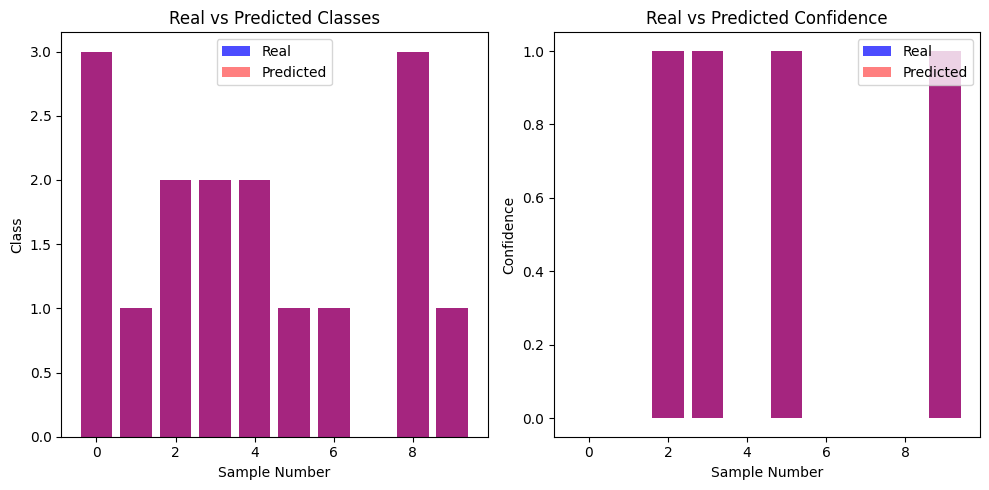

In [ ]:
import matplotlib.pyplot as plt

# 1. Подготовка данных:
sample_data = X_test[:10]
real_classes = y_class_test[:10]
real_confidences = y_conf_test[:10]

# 2. Прогнозирование:
predictions = best_model.predict(sample_data)
predicted_classes = predictions[0].argmax(axis=1)
predicted_confidences = predictions[1].flatten()

# 3. Визуализация результатов:

# Для классификации:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(10), real_classes, alpha=0.7, label="Real", color="blue")
plt.bar(range(10), predicted_classes, alpha=0.5, label="Predicted", color="red")
plt.xlabel("Sample Number")
plt.ylabel("Class")
plt.title("Real vs Predicted Classes")
plt.legend()

# Для уверенности:
plt.subplot(1, 2, 2)
plt.bar(range(10), real_confidences, alpha=0.7, label="Real", color="blue")
plt.bar(range(10), predicted_confidences, alpha=0.5, label="Predicted", color="red")
plt.xlabel("Sample Number")
plt.ylabel("Confidence")
plt.title("Real vs Predicted Confidence")
plt.legend()

plt.tight_layout()
plt.show()


   #Матрица ошибок (Confusion Matrix) для задачи классификации: Это помогает понять, какие классы модель часто путает между собой.

    #График рассеяния (Scatter plot) для задачи регрессии: Это покажет, насколько хорошо предсказанные уверенности соответствуют реальным значениям уверенности.

    #Гистограмма ошибок для задачи регрессии: Это покажет распределение ошибок (разницы между реальными и предсказанными уверенностями).

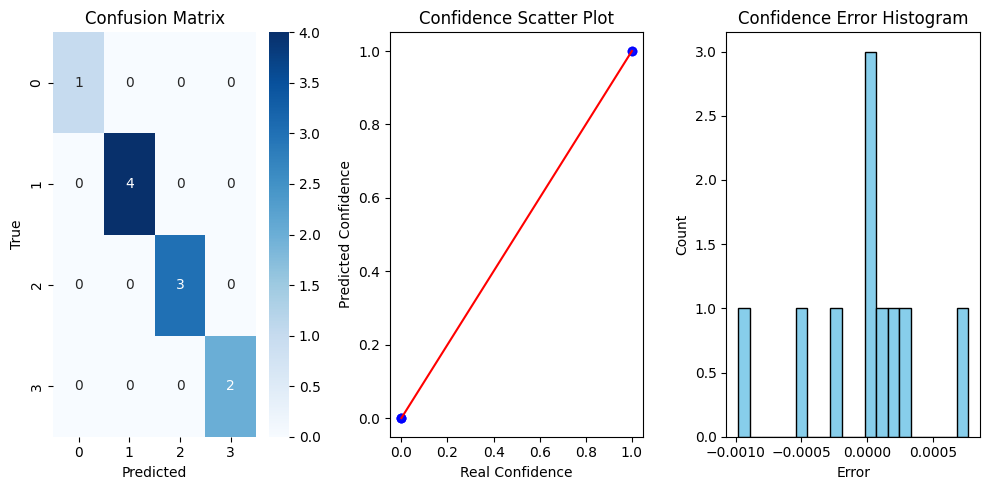

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Матрица ошибок для классификации
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
cm = confusion_matrix(real_classes, predicted_classes)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# 2. График рассеяния для уверенности
plt.subplot(1, 3, 2)
plt.scatter(real_confidences, predicted_confidences, alpha=0.5, color="blue")
plt.plot([min(real_confidences), max(real_confidences)], [min(real_confidences), max(real_confidences)], color="red")  # y=x line
plt.xlabel("Real Confidence")
plt.ylabel("Predicted Confidence")
plt.title("Confidence Scatter Plot")

# 3. Гистограмма ошибок для уверенности
plt.subplot(1, 3, 3)
errors = real_confidences - predicted_confidences
plt.hist(errors, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Error")
plt.ylabel("Count")
plt.title("Confidence Error Histogram")

plt.tight_layout()
plt.show()
